In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import folium
from sklearn.tree import export_graphviz
from IPython.display import display
pd.set_option('display.max_row', 300)
pd.set_option('display.max_columns', 100)

In [2]:
# 데이터 불러오기
df = pd.read_csv('시군별유동인구데이터.csv')
df

,년월,출발지(야간체류지) 시군코드,도착지 시군코드,10대남성 유입인구,20대남성 유입인구,30대남성 유입인구,40대남성 유입인구,50대남성 유입인구,60대남성 유입인구,70대남성 유입인구,10대여성 유입인구,20대여성 유입인구,30대여성 유입인구,40대여성 유입인구,50대여성 유입인구,60대여성 유입인구,70대여성 유입인구
0,202001,11170,41590,19.15,64.28,116.56,136.39,118.72,45.84,13.68,23.83,52.79,67.96,51.08,33.53,26.28,16.03
1,202001,11170,41610,39.55,39.38,48.18,63.35,59.68,29.78,11.60,29.66,30.79,44.08,36.09,25.58,16.77,9.27
2,202001,11170,41630,30.51,21.78,29.73,38.39,37.38,21.49,7.53,21.10,12.57,21.77,24.48,25.13,17.43,11.46
3,202001,11170,41650,29.74,17.65,26.94,35.66,32.29,21.60,12.11,31.00,20.25,19.12,27.59,23.03,15.15,7.43
4,202001,11170,41670,9.37,8.90,21.12,17.89,22.00,10.84,2.60,14.36,16.70,21.71,15.95,11.51,8.15,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85099,202012,29155,41820,0.12,0.83,0.54,0.16,0.71,0.50,0.22,0.62,1.05,0.90,0.69,0.18,0.32,0.21
85100,202012,29155,41830,0.38,0.82,0.45,0.66,0.25,0.92,0.07,0.00,1.18,0.00,0.20,0.16,0.56,0.25
85101,202012,29170,41110,6.97,35.91,27.35,21.80,22.02,9.26,2.42,10.00,22.55,14.96,7.48,15.39,9.21,5.09
85102,202012,29170,41130,13.45,27.70,24.01,24.48,28.95,8.63,4.57,8.87,21.94,11.87,12.69,15.28,7.72,8.06


In [3]:
# 데이터를 추출하기 위한 변수 입력
destination = input(">>> 확인할 지역 입력: ")
gender = input(">>> 성별 입력 (남성 / 여성): ")
age = input(">>> 확인할 나이대 입력(숫자만 입력): ")
month = input(">>> 확인할 달 입력(예 : 2월 --> 02): ")

print("\n" + month+ "월 " + destination + "지역에 관련된 " + age + "대 " + gender + "들의 유동인구를 확인합니다")
check_column = age + '대' + gender + ' ' + '유입인구'
month= '2020' + month


08월 41550지역에 관련된 40대 남성들의 유동인구를 확인합니다


In [4]:
# 입력한 변수 바탕으로 데이터 전처리
data = df.loc[:,['년월','출발지(야간체류지) 시군코드','도착지 시군코드',check_column]][df['년월']==int(month)]
data_simple = data[data['도착지 시군코드']==int(destination)]
data_simple = data_simple.drop(['년월','도착지 시군코드'],axis=1)
data_simple['출발지'] = data_simple['출발지(야간체류지) 시군코드']-(data_simple['출발지(야간체류지) 시군코드']%1000)
data_simple['출발지'] = data_simple['출발지']/1000
data_simple['출발지'] = data_simple['출발지'].astype(int)
data_simple=data_simple.drop('출발지(야간체류지) 시군코드',axis=1)
return_data=data_simple.groupby('출발지', as_index=False).sum()
return_data

,출발지,40대남성 유입인구
0,11,1338.59
1,26,88.14
2,27,81.27
3,28,402.61
4,29,51.29
5,30,164.13
6,31,25.94
7,36,46.19
8,41,22778.07
9,42,95.58


In [5]:
# df에서 입력한 지역에 따른 '출발지', '도착지' 시군코드 추출
data1 = df.loc[df['출발지(야간체류지) 시군코드'] == int(destination)]
data2 = df.loc[(df['도착지 시군코드']==int(destination))]
data3= pd.concat([data1,data2])
data3

,년월,출발지(야간체류지) 시군코드,도착지 시군코드,10대남성 유입인구,20대남성 유입인구,30대남성 유입인구,40대남성 유입인구,50대남성 유입인구,60대남성 유입인구,70대남성 유입인구,10대여성 유입인구,20대여성 유입인구,30대여성 유입인구,40대여성 유입인구,50대여성 유입인구,60대여성 유입인구,70대여성 유입인구
2567,202001,41550,41110,118.55,304.43,290.07,233.01,187.08,90.78,36.41,105.08,186.76,132.80,122.16,123.35,85.00,66.32
2568,202001,41550,41130,32.77,109.92,119.61,139.45,88.22,60.15,21.05,47.36,69.42,70.03,63.41,51.87,34.43,37.58
2569,202001,41550,41150,5.58,23.11,28.59,17.09,25.83,9.86,5.08,5.39,14.41,13.98,10.19,12.16,5.60,4.69
2570,202001,41550,41170,25.36,81.28,53.14,53.65,40.60,32.96,13.08,16.17,42.77,30.53,30.22,26.70,21.81,15.84
2571,202001,41550,41190,25.14,80.78,70.92,59.44,55.96,24.28,7.20,27.73,33.12,40.30,22.65,25.09,12.58,9.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84998,202012,47750,41550,0.00,0.00,0.04,1.06,0.45,0.58,0.00,0.00,0.00,0.00,0.00,0.17,0.43,0.00
85029,202012,29110,41550,0.93,0.45,1.20,0.99,4.30,0.89,0.04,0.06,0.91,1.13,1.64,1.06,1.49,0.09
85060,202012,29140,41550,1.62,2.22,3.42,10.57,8.34,1.40,0.72,1.58,2.13,1.13,2.04,1.05,1.38,0.72
85091,202012,29155,41550,0.19,1.80,2.72,3.56,3.19,1.06,0.27,1.68,0.98,2.08,0.74,0.69,0.84,0.23


In [6]:
# destination의 값이 출발지에 있다면 "출", 도착지에 있으면 "입"의 값을 가지는 출/입 열 생성
data1['출/입']='출'
data2['출/입']='입'
data3= pd.concat([data1,data2])
data3

<ipython-input-6-52232f82c203>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['출/입']='출'
<ipython-input-6-52232f82c203>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['출/입']='입'


,년월,출발지(야간체류지) 시군코드,도착지 시군코드,10대남성 유입인구,20대남성 유입인구,30대남성 유입인구,40대남성 유입인구,50대남성 유입인구,60대남성 유입인구,70대남성 유입인구,10대여성 유입인구,20대여성 유입인구,30대여성 유입인구,40대여성 유입인구,50대여성 유입인구,60대여성 유입인구,70대여성 유입인구,출/입
2567,202001,41550,41110,118.55,304.43,290.07,233.01,187.08,90.78,36.41,105.08,186.76,132.80,122.16,123.35,85.00,66.32,출
2568,202001,41550,41130,32.77,109.92,119.61,139.45,88.22,60.15,21.05,47.36,69.42,70.03,63.41,51.87,34.43,37.58,출
2569,202001,41550,41150,5.58,23.11,28.59,17.09,25.83,9.86,5.08,5.39,14.41,13.98,10.19,12.16,5.60,4.69,출
2570,202001,41550,41170,25.36,81.28,53.14,53.65,40.60,32.96,13.08,16.17,42.77,30.53,30.22,26.70,21.81,15.84,출
2571,202001,41550,41190,25.14,80.78,70.92,59.44,55.96,24.28,7.20,27.73,33.12,40.30,22.65,25.09,12.58,9.72,출
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84998,202012,47750,41550,0.00,0.00,0.04,1.06,0.45,0.58,0.00,0.00,0.00,0.00,0.00,0.17,0.43,0.00,입
85029,202012,29110,41550,0.93,0.45,1.20,0.99,4.30,0.89,0.04,0.06,0.91,1.13,1.64,1.06,1.49,0.09,입
85060,202012,29140,41550,1.62,2.22,3.42,10.57,8.34,1.40,0.72,1.58,2.13,1.13,2.04,1.05,1.38,0.72,입
85091,202012,29155,41550,0.19,1.80,2.72,3.56,3.19,1.06,0.27,1.68,0.98,2.08,0.74,0.69,0.84,0.23,입


In [7]:
# 출발지 시군코드와 도착지 시군코드열 제거 / 단, destination 코드가 아닌 코드값을 가지는 지역코드 열 생성
# data1.drop(columns=['출발지(야간체류지) 시군코드'], inplace=True)
# data2.drop(columns=['도착지 시군코드'], inplace=True)

In [8]:
data1['출발지(야간체류지) 시군코드']=0
data2['도착지 시군코드']=0
data3= pd.concat([data1,data2])
data3['도착지 시군코드']=data3['도착지 시군코드']+data3['출발지(야간체류지) 시군코드']
data3.drop(columns=['출발지(야간체류지) 시군코드'], inplace=True)
data3=data3.rename(columns={'도착지 시군코드':'지역코드'})
data3=data3[['년월', '지역코드', '출/입','10대남성 유입인구', '20대남성 유입인구', '30대남성 유입인구',
       '40대남성 유입인구', '50대남성 유입인구', '60대남성 유입인구', '70대남성 유입인구', '10대여성 유입인구',
       '20대여성 유입인구', '30대여성 유입인구', '40대여성 유입인구', '50대여성 유입인구', '60대여성 유입인구',
       '70대여성 유입인구']]
data3

<ipython-input-8-9d1f1de1339a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['출발지(야간체류지) 시군코드']=0
<ipython-input-8-9d1f1de1339a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['도착지 시군코드']=0


,년월,지역코드,출/입,10대남성 유입인구,20대남성 유입인구,30대남성 유입인구,40대남성 유입인구,50대남성 유입인구,60대남성 유입인구,70대남성 유입인구,10대여성 유입인구,20대여성 유입인구,30대여성 유입인구,40대여성 유입인구,50대여성 유입인구,60대여성 유입인구,70대여성 유입인구
2567,202001,41110,출,118.55,304.43,290.07,233.01,187.08,90.78,36.41,105.08,186.76,132.80,122.16,123.35,85.00,66.32
2568,202001,41130,출,32.77,109.92,119.61,139.45,88.22,60.15,21.05,47.36,69.42,70.03,63.41,51.87,34.43,37.58
2569,202001,41150,출,5.58,23.11,28.59,17.09,25.83,9.86,5.08,5.39,14.41,13.98,10.19,12.16,5.60,4.69
2570,202001,41170,출,25.36,81.28,53.14,53.65,40.60,32.96,13.08,16.17,42.77,30.53,30.22,26.70,21.81,15.84
2571,202001,41190,출,25.14,80.78,70.92,59.44,55.96,24.28,7.20,27.73,33.12,40.30,22.65,25.09,12.58,9.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84998,202012,47750,입,0.00,0.00,0.04,1.06,0.45,0.58,0.00,0.00,0.00,0.00,0.00,0.17,0.43,0.00
85029,202012,29110,입,0.93,0.45,1.20,0.99,4.30,0.89,0.04,0.06,0.91,1.13,1.64,1.06,1.49,0.09
85060,202012,29140,입,1.62,2.22,3.42,10.57,8.34,1.40,0.72,1.58,2.13,1.13,2.04,1.05,1.38,0.72
85091,202012,29155,입,0.19,1.80,2.72,3.56,3.19,1.06,0.27,1.68,0.98,2.08,0.74,0.69,0.84,0.23


In [9]:
filename = '유동인구_'+str(destination)
data3.to_csv(filename+".csv", index = None)

시각화

In [10]:
# 시군코드 - 도시명 연결
condition_list = [
    (return_data['출발지'] == 11),
    (return_data['출발지'] == 26),
    (return_data['출발지'] == 27),
    (return_data['출발지'] == 28),
    (return_data['출발지'] == 29),
    (return_data['출발지'] == 30),
    (return_data['출발지'] == 31),
    (return_data['출발지'] == 36),
    (return_data['출발지'] == 41),
    (return_data['출발지'] == 42),
    (return_data['출발지'] == 43),
    (return_data['출발지'] == 44),
    (return_data['출발지'] == 45),
    (return_data['출발지'] == 46),
    (return_data['출발지'] == 47),
    (return_data['출발지'] == 48),
    (return_data['출발지'] == 50)
]
city_list = ['서울특별시', '부산광역시', '대구광역시', '인천광역시',
               '광주광역시', '대전광역시', '울산광역시', '세종특별자치시',
               '경기도', '강원도', '충청북도', '충청남도', '전라북도',
               '전라남도', '경상북도', '경상남도', '제주특별자치도']

lat_list = [37.56, 35.16, 35.87, 37.46, 35.17, 36.37, 35.56, 36.25,
            37.59, 37.86, 36.63, 36.53, 35.72, 34.69, 36.55, 35.18, 33.57]

long_list = [126.90, 129.00, 128.53, 126.60, 126.80, 127.35, 129.28,
             127.24, 126.53, 127.68, 127.68, 126.51, 126.64, 125.93,
             129.28, 127.83, 126.29]

return_data['ADDR'] = np.select(condition_list, city_list, default='Not Specified')
return_data['lat'] = np.select(condition_list, lat_list, default='Not Specified')
return_data['long'] = np.select(condition_list, long_list, default='Not Specified')

return_data # 확인용 출력

,출발지,40대남성 유입인구,ADDR,lat,long
0,11,1338.59,서울특별시,37.56,126.9
1,26,88.14,부산광역시,35.16,129.0
2,27,81.27,대구광역시,35.87,128.53
3,28,402.61,인천광역시,37.46,126.6
4,29,51.29,광주광역시,35.17,126.8
5,30,164.13,대전광역시,36.37,127.35
6,31,25.94,울산광역시,35.56,129.28
7,36,46.19,세종특별자치시,36.25,127.24
8,41,22778.07,경기도,37.59,126.53
9,42,95.58,강원도,37.86,127.68


In [11]:
# 가공된 DataFrame 정렬
return_data_sorted = return_data.sort_values(by=[check_column], ascending=True)
return_data_sorted = return_data_sorted.reset_index()
return_data_sorted = return_data_sorted.drop('index', axis=1)
return_data_sorted #확인용 출력

,출발지,40대남성 유입인구,ADDR,lat,long
0,50,24.78,제주특별자치도,33.57,126.29
1,31,25.94,울산광역시,35.56,129.28
2,36,46.19,세종특별자치시,36.25,127.24
3,29,51.29,광주광역시,35.17,126.8
4,46,51.92,전라남도,34.69,125.93
5,27,81.27,대구광역시,35.87,128.53
6,26,88.14,부산광역시,35.16,129.0
7,42,95.58,강원도,37.86,127.68
8,47,103.79,경상북도,36.55,129.28
9,45,112.82,전라북도,35.72,126.64


In [12]:
# folium을 이용하여 지도 핸들링
map = folium.Map(location=[35.38, 127.51], zoom_start=6)

In [13]:
# Circle Marker로 지도에 아이콘 표시
cnt=0

for lat, long, addr, fp in zip(lat_list, long_list, return_data['ADDR'], return_data[check_column]):
    cnt += 1
    folium.CircleMarker(
        location=[lat, long],
        radius=5 + cnt,
        fill=True,
        fill_opacity=0.3,
        popup=(addr, fp)
    ).add_to(map)

map

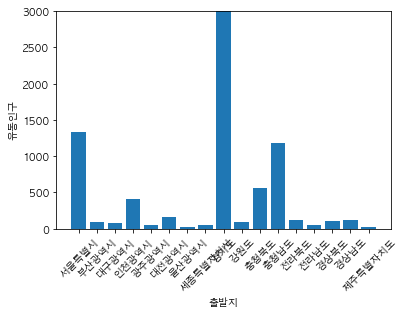

In [16]:
# Bar Plot 작성

# 한글 오류 문제 해결
plt.rcParams['font.family'] = 'AppleGothic' # Mac에서 실행할 경우, 주석 헤제
# plt.rcParams['font.family'] = 'Malgun Gothic' # Windows에서 실행할 경우, 주석 해제

plt.bar(return_data['ADDR'], return_data[check_column])
plt.xlabel('출발지')
plt.xticks(rotation=45)
plt.ylabel('유동인구')
plt.ylim(0, 3000)

plt.show()